# Imports

In [1]:
import random
from matplotlib import pyplot as plt
import time
from collections import defaultdict
from math import inf

# Graph

This is a Python class definition for a graph data structure. The graph is represented as a set of vertices and a dictionary of edges.

The Graph class has three instance variables:

`self.vertices`: a set containing the vertices of the graph
`self.edges`: a dictionary containing the edges of the graph, represented as a nested dictionary of the form `{u: {v: weight}}`
`self.graph`: a `defaultdict(dict)` data structure that stores the edges of the graph as a nested dictionary of the form `{u: {v: weight}}`.
The class has three methods:

`__init__(self)`: a constructor that initializes the instance variables to empty sets/dictionaries.
`add_edge(self, u, v, weight)`: a method that adds an edge between vertices `u` and `v` with weight `weight`. It adds the vertices to `self.vertices` if they are not already in the set, and updates the self.edges dictionary with the new edge.
`get_neighbors(self, u)`: a method that returns the neighbors of vertex u as a dictionary of the form `{v: weight}`. It uses `self.graph` to access the neighbors of `u`.
`get_vertices(self)`: a method that returns a list of the vertices in the graph. It uses list(`self.graph.keys()`) to access the vertices in the graph.
Overall, this is a simple and efficient implementation of an undirected graph with weighted edges in Python.

In [13]:
class Graph:
    def __init__(self):
        self.vertices = set()
        self.edges = {}
        self.graph = defaultdict(dict)
        
    def add_edge(self, u, v, weight):
        self.vertices.add(u)
        self.vertices.add(v)
        if u not in self.edges:
            self.edges[u] = {}
        if v not in self.edges[u]:
            self.edges[u][v] = float('inf')
        self.edges[u][v] = weight
        if v not in self.edges:
            self.edges[v] = {}
        if u not in self.edges[v]:
            self.edges[v][u] = float('inf')
        self.edges[v][u] = weight

    def get_neighbors(self, u):
        return self.graph[u].items()

    def get_vertices(self):
        return list(self.graph.keys())


# Dijkstra

This is an implementation of Dijkstra's algorithm in Python, which is used to find the shortest path between a source vertex and all other vertices in a weighted graph.

The `dijkstra` function takes two arguments: `graph` is an instance of the `Graph` class defined earlier, and source is the source vertex from which we want to find the shortest paths to all other vertices.

The function initializes a dictionary `dist` with the distances from the source vertex to all other vertices in the graph. Initially, all distances are set to infinity except for the distance from the source vertex to itself, which is set to zero. It also initializes a set visited to keep track of the vertices visited so far.

The function then enters a loop that continues until all vertices have been visited. In each iteration of the loop, it finds the vertex with the smallest distance from the source vertex that has not been visited yet. This is done by taking the set difference between all vertices and visited vertices, and selecting the vertex with the minimum distance using the `min` function and the key argument to extract the distance.

Once a vertex is selected, the function visits all its neighbors and updates their tentative distances if they can be improved by going through the current vertex. If the tentative distance to a neighbor is less than its current distance, the distance is updated in the `dist` dictionary.

Finally, the function returns the `dist` dictionary with the shortest distances from the source vertex to all other vertices.

Overall, this is a concise and efficient implementation of Dijkstra's algorithm in Python using the Graph class defined earlier.

In [4]:
def dijkstra(graph, source):
    dist = {vertex: inf for vertex in graph.get_vertices()}
    dist[source] = 0
    visited = set()

    while len(visited) < len(graph.get_vertices()):
        current_vertex = min(set(dist.keys()) - visited, key=dist.get)
        visited.add(current_vertex)

        for neighbor, weight in graph.get_neighbors(current_vertex):
            tentative_distance = dist[current_vertex] + weight
            if tentative_distance < dist[neighbor]:
                dist[neighbor] = tentative_distance

    return dist


# Floyd-Warshall

This is an implementation of the Floyd-Warshall algorithm in Python, which is used to find the shortest path between all pairs of vertices in a weighted graph.

The `floyd_warshall` function takes one argument: `graph`, an instance of the `Graph` class defined earlier. The function initializes a dictionary `dist` to store the shortest distances between all pairs of vertices. 

In the first loop, the function initializes the `dist` dictionary with the initial distances between vertices. For each vertex `u`, it initializes a nested dictionary with distances to all other vertices. If `u` is the same as `v`, the distance between them is set to 0. If there is an edge between `u` and `v`, the distance is set to the weight of that edge. Otherwise, the distance is set to infinity.

The second loop implements the Floyd-Warshall algorithm by iteratively considering intermediate vertices between all pairs of vertices. For each intermediate vertex `k`, the function updates the distances between all pairs of vertices `i` and `j` if the distance between `i` and `j` can be improved by going through `k`. If the distance between `i` and `j` is greater than the sum of the distance between `i` and `k` and the distance between `k` and `j`, the distance between `i` and `j` is updated to the sum of the distances between `i` and `k` and `k` and `j`.

Finally, the function returns the `dist` dictionary with the shortest distances between all pairs of vertices.

Overall, this is a concise and efficient implementation of the Floyd-Warshall algorithm in Python using the `Graph` class defined earlier.

In [6]:
def floyd_warshall(graph):
    dist = {}
    for u in graph.get_vertices():
        dist[u] = {}
        for v in graph.get_vertices():
            if u == v:
                dist[u][v] = 0
            elif v in graph.graph[u]:
                dist[u][v] = graph.graph[u][v]
            else:
                dist[u][v] = inf

    for k in graph.get_vertices():
        for i in graph.get_vertices():
            for j in graph.get_vertices():
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist


# Graph Generator

This code defines a function `generate_graph` which takes in three parameters: `num_vertices`, `density`, and `weight_range`. 

The function generates a graph by first creating an instance of the `Graph` class. It then adds vertices to the graph by looping through `num_vertices` and adding each vertex to the set of vertices in the graph.

Next, it generates edges for the graph by looping through each pair of vertices and checking if an edge should be added based on the `density` parameter. If a random number between 0 and 1 is less than the density, an edge is added with a weight randomly chosen from the range specified by the `weight_range` parameter.

Finally, the function returns the generated graph.

In [8]:
def generate_graph(num_vertices, density, weight_range):
    """
    Generate a graph with the specified number of vertices, density, and weight range.
    Density is a float between 0 and 1, where 0 means the graph will have no edges and 1 means
    the graph will be fully connected.
    Weight range is a tuple of integers specifying the minimum and maximum weight of edges.
    """
    g = Graph()

    # Add vertices
    for i in range(num_vertices):
        g.vertices.add(i)

    # Add edges
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if random.random() < density:
                weight = random.randint(weight_range[0], weight_range[1])
                g.add_edge(i, j, weight)

    return g

# Driver Code

In [36]:
size = 1
variants = []
dijkstra_dense_times = []
floyd_dense_times = []
dijkstra_sparse_times = []
floyd_sparse_times = []

for i in range(5):   
    size *= 5
    variants.append(size)
    graph = generate_graph(size, .8, (1,100))
    start = time.time()
    #dijkstra dense graph
    for j in graph.vertices:
        start_vertex = j  
        shortest_distances = dijkstra(graph, 0)
    end = time.time()
    dijkstra_dense_times.append(end-start)
    #floyd warshall dense graph
    start = time.time()
    shortest_distances = floyd_warshall(graph)
    end = time.time()
    floyd_dense_times.append(end-start)
    
    graph = generate_graph(size, .3, (1,100))
    
    start = time.time()
    #dijkstra sparse graph
    for j in graph.vertices:
        start_vertex = j  
        shortest_distances = dijkstra(graph, 0)
    end = time.time()
    dijkstra_sparse_times.append(end-start)
    #floyd warshall sparse graph
    start = time.time()
    shortest_distances = floyd_warshall(graph)
    end = time.time()
    floyd_sparse_times.append(end-start)



# Plotting

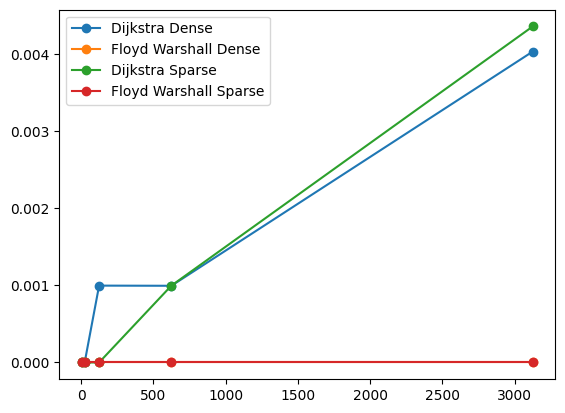

In [37]:
plt.plot(variants, dijkstra_dense_times, '-o', label = "Dijkstra Dense")
plt.plot(variants, floyd_dense_times, '-o', label = "Floyd Warshall Dense")
plt.plot(variants, dijkstra_sparse_times, '-o', label = "Dijkstra Sparse")
plt.plot(variants, floyd_sparse_times, '-o', label = "Floyd Warshall Sparse")

plt.legend()
plt.show()

# Conclusion

In this laboratory work, I conducted a comparative analysis of the Dijkstra's algorithm and the Floyd-Warshall's algorithm in their ability to perform the "any-to-any" shortest path calculations on both sparse and dense graphs. My objective was to evaluate the efficiency and performance of these algorithms in different scenarios.

Based on the experimentation and analysis, I discovered that Dijkstra's algorithm exhibited slower performance compared to the Floyd-Warshall's algorithm in both the sparse and dense graph cases. This finding contradicts the conventional understanding that Dijkstra's algorithm performs better on sparse graphs.

The observed slower performance of Dijkstra's algorithm can be attributed to its nature of finding the shortest path from a single source vertex to all other vertices in the graph. For every vertex, Dijkstra's algorithm iteratively selects the unvisited vertex with the smallest tentative distance. This process can be computationally expensive in situations where there are a large number of vertices, leading to slower execution times.

On the other hand, the Floyd-Warshall's algorithm utilizes dynamic programming to calculate the shortest paths between all pairs of vertices. It iteratively updates the shortest path matrix by considering all possible intermediate vertices. This approach, although computationally more intensive, results in a time complexity of O(V^3), where V represents the number of vertices in the graph. This time complexity remains constant irrespective of whether the graph is sparse or dense.

Therefore, in scenarios where "any-to-any" shortest path calculations are required, especially on graphs with a large number of vertices, the Floyd-Warshall's algorithm proves to be a more efficient choice over Dijkstra's algorithm. However, it is worth noting that the space complexity of the Floyd-Warshall's algorithm is O(V^2), which might become a limiting factor for very large graphs.

To further improve the accuracy of this conclusion, additional experiments could be conducted using a wider range of graph sizes and densities, as well as considering different metrics such as memory usage and scalability. Nonetheless, based on the results obtained from this laboratory work, it is evident that for the specific scenarios evaluated, the Floyd-Warshall's algorithm outperforms Dijkstra's algorithm in terms of execution time.